In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde

In [23]:
# See data/REAMD.md for longer names/details.
columns = ['x acc', 'y acc', 'z acc', 'label']
labels = ['Computer', 'Moving', 'Standing', 'Walking', 'Stairs',
          'Walking + talking', 'Standing + talking']
labels_map = {
    1: 'Computer',
    2: 'Moving',
    3: 'Standing',
    4: 'Walking',
    5: 'Stairs',
    6: 'Walking + talking',
    7: 'Standing + talking'
}
# usecols is used to skip reading the 'id' column, which has errors
ad = pd.read_csv('data/1.csv', sep=',', header=None, names=columns,
                 usecols=[1,2,3,4])

In [42]:
# TODO: put some reasonable values here
x_min_max = (1455, 2356)
y_min_max = (1697, 2713)
z_min_max = (1644, 2739)

for column in columns:
    if column == 'label':
        # drop row with not a valid label
        ad = ad.loc[(1 <= ad['label']) & (ad['label'] <= 7), :]
        print(ad[column].value_counts())
    if column == 'x acc':
        # TODO detect anomalies
        #print(ad[column].sort_values().tail(40))
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'y acc':
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'z acc':
        print(column, 'min max:', ad[column].min(), ad[column].max())

x acc min max: 1455 2356
y acc min max: 1697 2713
z acc min max: 1644 2739
7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64


In [43]:
ad['label'] = ad['label'].map(labels_map)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8be676a1f0>,
      dtype=object)

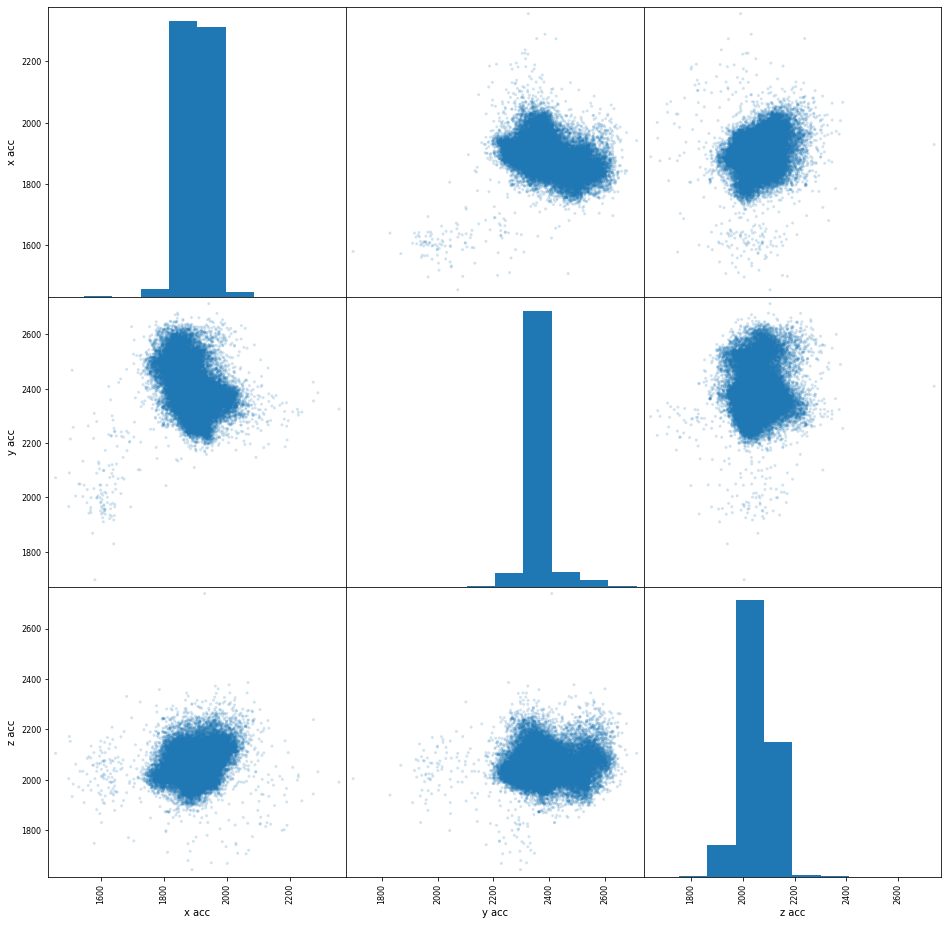

In [19]:
scatter_matrix(ad, alpha=.2, figsize=(16,16), diagonal='hist')
#plt.savefig('scattermat.png')

x acc min: 1455, max: 2356
(1454.098, 1545.1]    0.000068
(1545.1, 1635.2]      0.000418
(1635.2, 1725.3]      0.000302
(1725.3, 1815.4]      0.012972
(1815.4, 1905.5]      0.494972
(1905.5, 1995.6]      0.483065
(1995.6, 2085.7]      0.007815
(2085.7, 2175.8]      0.000283
(2175.8, 2265.9]      0.000080
(2265.9, 2356.0]      0.000025
Name: x acc, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


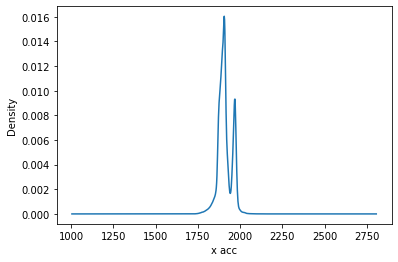

In [59]:
def explore_acc(feature='x acc'):
    feat = ad[feature]
    print(f"{feature} min: {ad[feature].min()}, max: {ad[feature].max()}")
    # show statistics
    print(feat.value_counts(bins=10, normalize=True, sort=False))
    # plot distribution
    print(feat.plot.hist(bins=100))
    plt.xlabel(feature)

explore_acc()


Standing + talking    0.515372
Computer              0.207243
Walking               0.165292
Standing              0.068794
Stairs                0.019637
Walking + talking     0.017951
Moving                0.005711
Name: label, dtype: float64


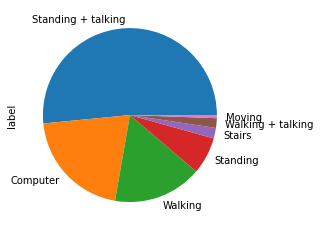

In [56]:
def explore_label():
    feat = ad['label']

    # Show statistics and dirstibution
    print(feat.value_counts(normalize=True, sort=True))
    feat.value_counts(normalize=True, sort=True).plot.pie()


explore_label()
